In [1]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [55]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("./Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("./Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("./Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("./Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("./Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("./Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("./Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("./Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 2 ------------------------ Trajectory import
TAB_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Trajectory_TAB_Case2.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Trajectory_Wave_Case2.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("./Case_Liu/Trajectories/Trajectory_Experiment_Case2.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Trajectory_Wave_Case4.csv", header=None) # TAB_Traject_Case4.csv
Wave_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Trajectory_Wave_Case4.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("./Case_Liu/Trajectories/Trajectory_Experiment_Case4.csv", header=None) # Trajectory_Experiment_Case4.csv

In [6]:
fdir = "./Case2/TAB/lagrangian/sprayCloud" # sprayCloud file of Case 3 TAB model to read vtp from VTK file 
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

In [7]:
# create reader
reader = vtk.vtkXMLPolyDataReader() # a class that reads an XML-based VTK file format that contains polygonal data
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = [];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))): # fdir in where vtp files stored 
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    points.append((vtk_to_numpy(data.GetPoints().GetData())))

Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3154.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3163.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3172.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3181.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3190.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3199.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3208.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3217.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3226.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3235.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3244.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3253.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3262.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3271.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3280.vtp
Reading: ./Case2/TAB/lagrangian/sprayCloud/sprayCloud_3

In [8]:
d0 =[];
for i in range(0, len(points)):
    d0.append(np.array(point_d0[i]))
d0=np.concatenate(d0,axis=0)

In [9]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))
    

In [10]:
diameter =[]
Reyn =[]
diameter0=[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))
#     Reyn.append(np.array(Re[i]))
    diameter0.append(np.array(d0[i]))

In [11]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total,diameter_total))
c_sorted = c[np.argsort(c[:, 0])]


(0.0, 0.008)

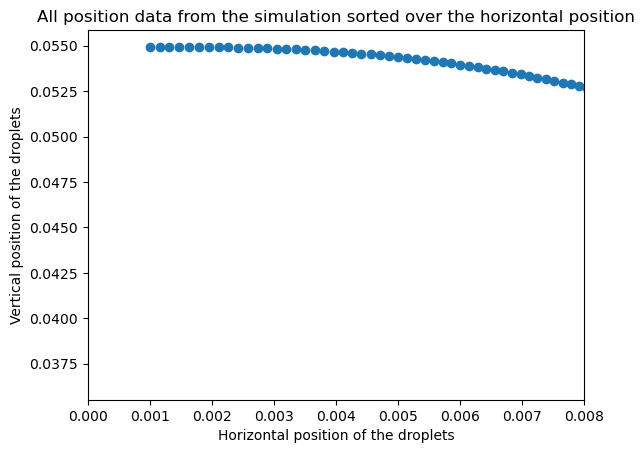

In [12]:
plt.plot(c_sorted[:,0]+0.00572,c_sorted[:,1], 'o')
plt.xlabel('Horizontal position of the droplets')
plt.ylabel('Vertical position of the droplets')
plt.title('All position data from the simulation sorted over the horizontal position')
plt.xlim(0,0.008)

(-0.0072, 0.006)

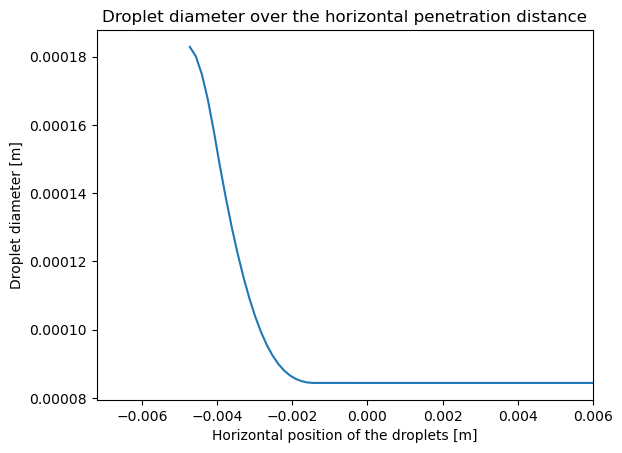

In [13]:
plt.plot(c_sorted[:,0],c_sorted[:,2])
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Droplet diameter [m]')
plt.title('Droplet diameter over the horizontal penetration distance')
plt.xlim(-0.0072,0.006)

In [14]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)

 
splitedSize = round(len(c_sorted[:,2])/60)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]


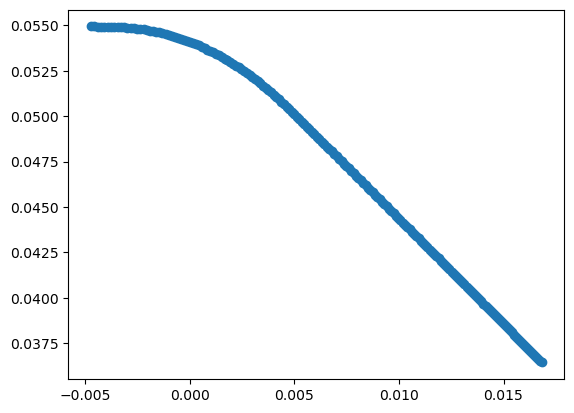

In [15]:
plt.plot(c_sorted[:,0],c_sorted[:,1], 'o')

In [56]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

(-0.0047625, 0.007)

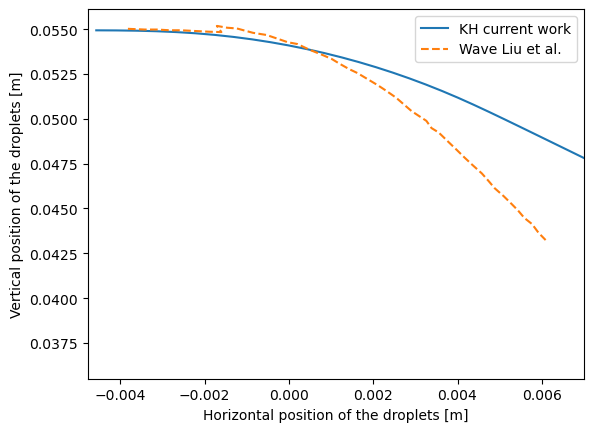

In [63]:
plt.plot(c_avgx,c_avgy, label='KH current work')
# plt.plot(((TAB_Traject_Case2.iloc[:,0])/1000), ((TAB_Traject_Case2.iloc[:,1]-2)/1e3), '--',label='TAB Liu et al.')
# Traject_Exp_Case2.iloc[:,0] = Traject_Exp_Case2.iloc[:,0].astype(float)
plt.plot(((Wave_Traject_Case2.iloc[:,0])), (Wave_Traject_Case2.iloc[:,1]), '--',label='Wave Liu et al.')
#plt.plot(((Traject_Exp_Case2.iloc[:,0])), ((Traject_Exp_Case2.iloc[:,1]-2)), 'o',label='Experiment')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.007)


TypeError: unsupported operand type(s) for -: 'str' and 'float'

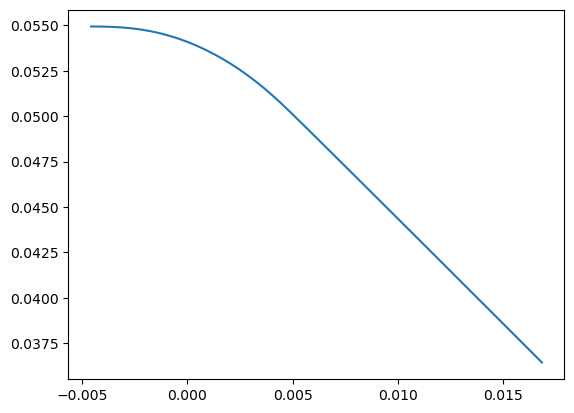

In [45]:
plt.plot((c_avgx),c_avgy, label='KH current work')
plt.plot(((TAB_Traject_Case4.iloc[:,0])-0.0047625), ((TAB_Traject_Case4.iloc[:,1])), '--',label='TAB Liu et al.')
# plt.plot((Wave_Traject_Case4.iloc[:,0])/1e3-0.0047625,(Wave_Traject_Case4.iloc[:,1])/1e3, '--', label='Wave Liu et al.')
plt.plot(((Traject_Exp_Case4.iloc[:,0])-0.0047625), ((Traject_Exp_Case4.iloc[:,1])), 'o',label='Experiment')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0)
plt.ylim(0.042,0.006)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

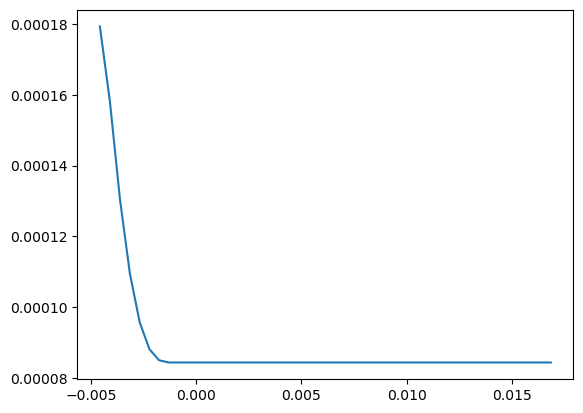

In [24]:
plt.plot(c_avgx,d_avg, label='KH_Stijn')
plt.plot(((data_Wave.iloc[:, 0])/1000), (data_Wave.iloc[:, 1]/1e6), '--', label='Wave')
plt.plot(((data_TAB.iloc[:, 0])/1000), (data_TAB.iloc[:, 1]/1e6), '--', label='TAB')
plt.plot(((data_PDPA.iloc[:,0])/1000), (data_PDPA.iloc[:,1]/1e6), 'ko', label='PDPA')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Average droplet diameter [m]')
plt.title('Average droplet diameter over the horizontal penetration distance')
plt.legend()
plt.xlim(-0.0047625,0.006)

(-0.0047625, 0.006)

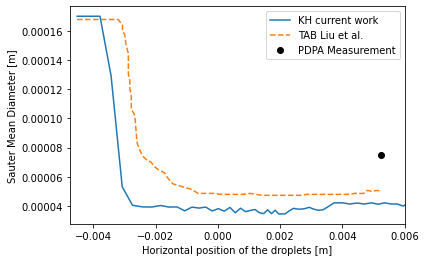

In [17]:
plt.plot(c_avgx,d32, label='KH current work')
# plt.plot(((data_Wave.iloc[:, 0])/1000), (data_Wave.iloc[:, 1]/1e6), '--', label='Wave Liu et al.')
plt.plot(((data_TAB.iloc[:, 0])/1000), (data_TAB.iloc[:, 1]/1e6), '--', label='TAB Liu et al.')
plt.plot(((data_PDPA.iloc[:,0])/1000), (data_PDPA.iloc[:,1]/1e6), 'ko', label='PDPA Measurement')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.legend()
plt.xlim(-0.0047625,0.006)


(-0.0047625, 0.006)

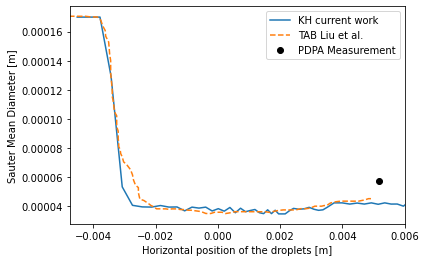

In [18]:
plt.plot(c_avgx,d32, label='KH current work')
plt.plot(TAB_Case3.iloc[:,0]/1e3-0.0047625,TAB_Case3.iloc[:,1]/1e6, '--', label='TAB Liu et al.')
# plt.plot(KH_Case3.iloc[:,0]/1e3-0.0047625,KH_Case3.iloc[:,1]/1e6, '--', label='Wave Liu et al.')
plt.plot(PDPA_Case3.iloc[:,0]/1e3-0.0047625,PDPA_Case3.iloc[:,1]/1e6, 'ko', label='PDPA Measurement')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.xlim(-0.0047625,0.006)

Text(0, 0.5, 'Droplet diameter [m]')

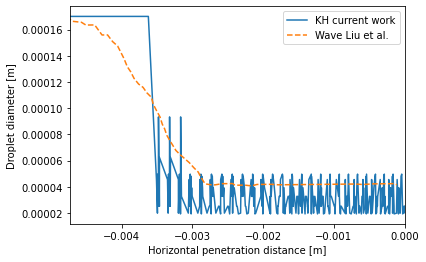

In [19]:
# plt.plot(c_avgx,d_avg, label='KH current work')
plt.plot(c_sorted[:,0],c_sorted[:,2],label='KH current work')
plt.plot(((data_C4_SingleD.iloc[:, 0])/1e3), data_C4_SingleD.iloc[:, 1]/1e6, '--', label='Wave Liu et al.')
# plt.plot(c_sorted[:,0],c_sorted[:,2], label='Simulation openFoam')
plt.xlim(-0.0047325,0.00)
plt.legend()
plt.xlabel('Horizontal penetration distance [m]')
plt.ylabel('Droplet diameter [m]')

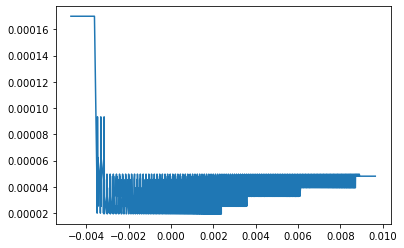

In [21]:
plt.plot(c_sorted[:,0],c_sorted[:,2])